<a href="https://colab.research.google.com/github/agustinaswd/RAKAMIN_DS26_MiniProject2/blob/main/Mini_Project_Investigate_Business_Hotel_using_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.2


In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 23.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rakamin/hotel_bookings_data.csv')

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
104131,City Hotel,0,89,2019,March,1,3,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,127.8,0,1,Check-Out
69481,City Hotel,1,174,2019,August,22,1,0,2,2,...,0,Non Refund,58.0,NaN,0,Personal,100.0,0,0,Canceled
50896,City Hotel,1,7,2018,July,20,11,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,143.0,0,0,Canceled
82043,City Hotel,1,305,2018,December,40,1,1,1,2,...,0,Non Refund,35.0,NaN,17,Personal,100.0,0,0,Canceled
68507,City Hotel,1,175,2019,July,20,19,0,1,1,...,0,Non Refund,44.0,NaN,0,Personal,90.0,0,0,Canceled


# Task 1

In [ ]:
df_pre = df.copy()

## Handling Null Value

In [ ]:
#check null value
counts = df_pre.isna().sum().sort_values(ascending=False)
#cek % null value
percentages = round(df.isna().mean() * 100, 3).sort_values(ascending=False)
#append
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
company,112593,94.307
agent,16340,13.686
city,488,0.409
children,4,0.003
hotel,0,0.000
is_repeated_guest,0,0.000
total_of_special_requests,0,0.000
required_car_parking_spaces,0,0.000
adr,0,0.000
customer_type,0,0.000


In [ ]:
#Handling Missing Values (drop 4 baris kolom children yg kosong)
df_pre = df_pre.dropna(subset=['children'])

In [ ]:
df_pre['city']= df_pre['city'].fillna(df_pre['city'].mode()[0])
df_pre.drop('company', axis = 1, inplace=True)
df_pre.drop('agent', axis = 1, inplace = True)

<ipython-input-6-2685831279ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['city']= df_pre['city'].fillna(df_pre['city'].mode()[0])
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Adjust Data Type

In [ ]:
#data type
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_weekdays_nights        119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [ ]:
# children jd int
df_pre['children'] = df_pre['children'].astype(int)

## Handling Value Column

In [ ]:
#value column
for col in df_pre:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
------------------------------ 

value counts of column is_canceled
0    75166
1    44224
Name: is_canceled, dtype: int64
------------------------------ 

value counts of column lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64
------------------------------ 

value counts of column arrival_date_year
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64
------------------------------ 

value counts of column arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
------------------------------ 

value cou

there's **'undefined' value in meal, market_Segment, distribution_channel** columns

In [ ]:
#market_segment
df_pre['market_segment'].mode()[0]

'Online TA'

In [ ]:
#distribution_channel
df_pre['distribution_channel'].mode()[0]

'TA/TO'

In [ ]:
#adjust value meal_unident dan distribusi_channel_unid dengan mode
#meal SC = no meal package
df_pre['meal'].replace('Undefined','SC', inplace= True)
df_pre['distribution_channel'].replace('Undefined','TA/TO', inplace= True)
df_pre['market_segment'].replace('Undefined','Online TA', inplace= True)

In [ ]:
df_pre.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2018.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
null = ['adr', 'adults', 'stays_in_weekend_nights', 'stays_in_weekdays_nights']
df[null].describe()

,adr,adults,stays_in_weekend_nights,stays_in_weekdays_nights
count,119390.000000,119390.000000,119390.000000,119390.000000
mean,101.831122,1.856403,0.927599,2.500302
std,50.535790,0.579261,0.998613,1.908286
min,-6.380000,0.000000,0.000000,0.000000
25%,69.290000,2.000000,0.000000,1.000000
50%,94.575000,2.000000,1.000000,2.000000
75%,126.000000,2.000000,2.000000,3.000000
max,5400.000000,55.000000,19.000000,50.000000


In [ ]:
# there are a value of a adr columns that below 0 
df_pre.drop(df_pre[df_pre['adr'] < 0].index, inplace = True)

# since it's impossible to have 0 adults to book a hotel room 
df_pre.loc[(df_pre.adults <= 0,'adults')] = 1  

# there are a value of a stay_in_weekend_nights columns that below 0 
df_pre.drop(df_pre[df_pre['stays_in_weekend_nights'] < 0].index, inplace = True)

# there are a value of a stay_in_weekdays_nights columns that below 0 
df_pre.drop(df_pre[df_pre['stays_in_weekdays_nights'] < 0].index, inplace = True)

# Task 2

##Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
df_agg = df_pre.groupby(['arrival_date_month', 'hotel'])['arrival_date_year'].count().reset_index()
df_agg.columns = ['arrival_month', 'hotel_type', 'number_of_booking']
df_agg

,arrival_month,hotel_type,number_of_booking
0,April,City Hotel,4965
1,April,Resort Hotel,3103
2,August,City Hotel,7894
3,August,Resort Hotel,3045
4,December,City Hotel,7605
5,December,Resort Hotel,3555
6,February,City Hotel,4132
7,February,Resort Hotel,2648
8,January,City Hotel,4357
9,January,Resort Hotel,2437


In [ ]:
#see why the hint in the question is to look for Sept & Oct
dfm = df_pre.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','arrival_date_month':'count'}).rename(columns={'arrival_date_month':'number_of_booking'}).reset_index()
dfm.columns = ['hotel_type','arrival_month','unique_year','number_of_booking']
dfm


,hotel_type,arrival_month,unique_year,number_of_booking
0,City Hotel,April,2,4965
1,City Hotel,August,2,7894
2,City Hotel,December,2,7605
3,City Hotel,February,2,4132
4,City Hotel,January,2,4357
5,City Hotel,July,2,8232
6,City Hotel,June,2,7480
7,City Hotel,March,2,3736
8,City Hotel,May,2,6458
9,City Hotel,November,2,7400


terlihat dr unique_year, September & October memiliki data untuk 3 tahun sementara bulan lainnya hanya 2. maka akan dilakukan normalisasi untuk bulan September & Oktober

## Normalization

In [ ]:
# normalisasi to get the average booking each month
dfm['avg_number_of_booking'] = round(dfm['number_of_booking']/dfm['unique_year'])
dfm  

,hotel_type,arrival_month,unique_year,number_of_booking,avg_number_of_booking
0,City Hotel,April,2,4965,2482.0
1,City Hotel,August,2,7894,3947.0
2,City Hotel,December,2,7605,3802.0
3,City Hotel,February,2,4132,2066.0
4,City Hotel,January,2,4357,2178.0
5,City Hotel,July,2,8232,4116.0
6,City Hotel,June,2,7480,3740.0
7,City Hotel,March,2,3736,1868.0
8,City Hotel,May,2,6458,3229.0
9,City Hotel,November,2,7400,3700.0


## Month Based

In [ ]:
list_name_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']
dfm['arrival_month'] = pd.Categorical(dfm['arrival_month'], categories=list_name_of_months, ordered=True)
dfm = dfm.sort_values(by=['hotel_type', 'arrival_month'])
dfm

,hotel_type,arrival_month,unique_year,number_of_booking,avg_number_of_booking
4,City Hotel,January,2,4357,2178.0
3,City Hotel,February,2,4132,2066.0
7,City Hotel,March,2,3736,1868.0
0,City Hotel,April,2,4965,2482.0
8,City Hotel,May,2,6458,3229.0
6,City Hotel,June,2,7480,3740.0
5,City Hotel,July,2,8232,4116.0
1,City Hotel,August,2,7894,3947.0
11,City Hotel,September,3,8088,2696.0
10,City Hotel,October,3,8979,2993.0


## Visualization

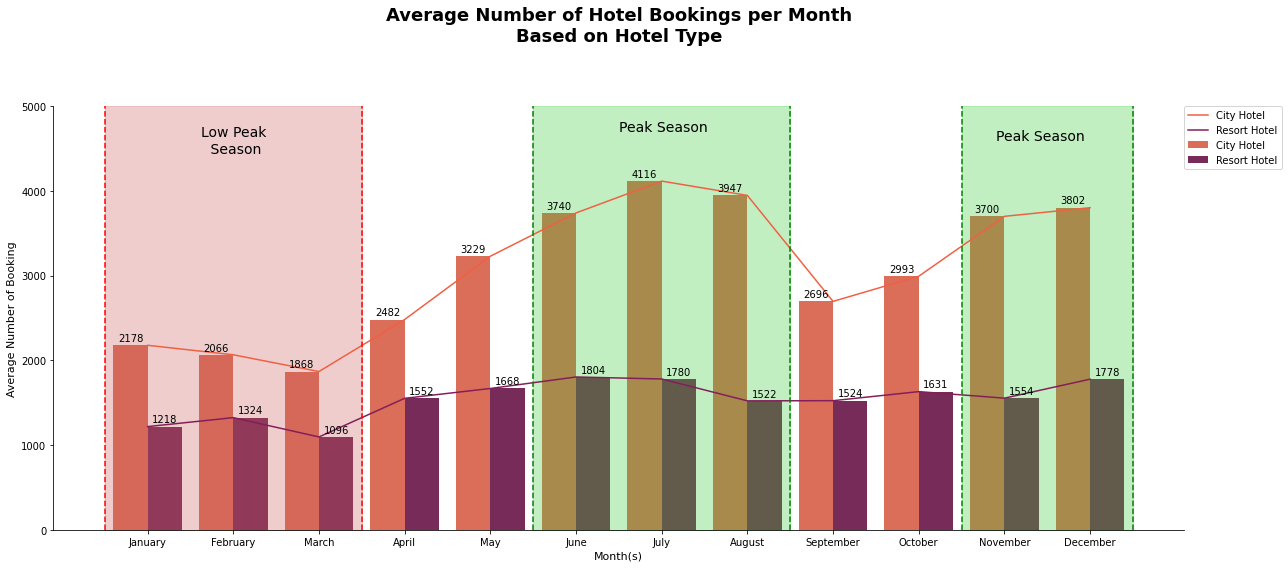

In [ ]:
# peak season = june july
fig, ax = plt.subplots(figsize=(18, 8))
plt.title("Average Number of Hotel Bookings per Month\nBased on Hotel Type", fontsize=18, color='black', weight='bold', pad=65)
sns.barplot(x='arrival_month', y ='avg_number_of_booking', data=dfm, hue='hotel_type', palette='rocket_r')
sns.lineplot(x='arrival_month', y ='avg_number_of_booking', data=dfm, hue='hotel_type', palette='rocket_r')


plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,8.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=5.5, y=4750, s='Peak Season', fontsize=14, color='black', va='center')

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=1, y=4450, s='Low Peak\n Season', fontsize=14, color='black', ha='center')

plt.axvline(9.5, ls='--', color='green')
plt.axvline(11.5, ls='--', color='green')
plt.stackplot(np.arange(9.5,12.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=9.9, y=4650, s='Peak Season', fontsize=14, color='black', va='center')

sns.despine()
plt.tight_layout()

- High peak season occurs in June - August for city & resort hotels. This can happen because this month is the semester break for students and students in Indonesia. 
- High peak season also occurs in November & December, which is expected due to the New Year holidays as well as the end of the annual leave allotment
- Low peak season occurs in January - March. This can happen because this range starts a new season for both schools and offices. So that the focus of students and workers is centered on school or office activities
- To optimize hotel room bookings, the hotel can implement a new year's promo so that it can be more optimal during the low peak season.


# Task 3

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Total Stays

In [ ]:
df_pre['total_stays'] = df_pre['stays_in_weekend_nights'] + df_pre['stays_in_weekdays_nights']
df_pre.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays
81830,City Hotel,1,178,2018,June,18,28,0,3,1,...,0,Non Refund,46,Personal,110.00,0,0,Canceled,1,3
86204,City Hotel,0,3,2018,May,13,26,2,2,2,...,0,No Deposit,0,Personal,136.50,0,1,Check-Out,3,4
115451,City Hotel,0,405,2019,September,27,4,0,2,1,...,1,No Deposit,0,Family,91.50,0,0,Check-Out,1,2
54725,City Hotel,1,135,2018,September,31,24,2,3,2,...,0,No Deposit,0,Personal,99.45,0,0,Canceled,2,5
95791,City Hotel,0,148,2018,October,35,21,2,1,2,...,1,No Deposit,0,Personal,72.25,0,0,Check-Out,2,3


In [ ]:
#cluster of the total stays
duration_list = []
for i in df_pre['total_stays']:
    if i >= 1 and i <= 7:
        group = '1 Week'
    elif i >= 8 and i <= 14:
        group = '2 Weeks'
    elif i >= 15 and i <= 21:
        group = '3 Weeks'
    else: 
        group = '> 4 Weeks'
    duration_list.append(group)
df_pre['stay_duration_group'] = duration_list

In [ ]:
hotel_stay = df_pre.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'adr':'count'}).reset_index()
hotel_stay.rename(columns={'adr':'nums_booking'}, inplace=True)

#create sum booking column
df_sum = hotel_stay.groupby(['hotel', 'stay_duration_group']).agg({'nums_booking':'sum'}).reset_index()
df_sum.rename(columns={'nums_booking':'sum_booking'}, inplace=True)
hotel_stay = hotel_stay.merge(df_sum, on=['hotel', 'stay_duration_group'])

#create cancellation rate
hotel_stay['cancellation_rate'] = round((hotel_stay['nums_booking']/hotel_stay['sum_booking'])*100, 1)
hotel_stay

,hotel,stay_duration_group,is_canceled,nums_booking,sum_booking,cancellation_rate
0,City Hotel,1 Week,0,45348,77747,58.3
1,City Hotel,1 Week,1,32399,77747,41.7
2,City Hotel,2 Weeks,0,528,1086,48.6
3,City Hotel,2 Weeks,1,558,1086,51.4
4,City Hotel,3 Weeks,0,31,108,28.7
5,City Hotel,3 Weeks,1,77,108,71.3
6,City Hotel,> 4 Weeks,0,321,385,83.4
7,City Hotel,> 4 Weeks,1,64,385,16.6
8,Resort Hotel,1 Week,0,25760,35667,72.2
9,Resort Hotel,1 Week,1,9907,35667,27.8


In [ ]:
#pick the data that hotels has been cancelled
hotel_stay_plot = hotel_stay[hotel_stay['is_canceled']==1].sort_values('stay_duration_group', ascending=True)
hotel_stay_plot

,hotel,stay_duration_group,is_canceled,nums_booking,sum_booking,cancellation_rate
1,City Hotel,1 Week,1,32399,77747,41.7
9,Resort Hotel,1 Week,1,9907,35667,27.8
3,City Hotel,2 Weeks,1,558,1086,51.4
11,Resort Hotel,2 Weeks,1,1078,3731,28.9
5,City Hotel,3 Weeks,1,77,108,71.3
13,Resort Hotel,3 Weeks,1,79,169,46.7
7,City Hotel,> 4 Weeks,1,64,385,16.6
15,Resort Hotel,> 4 Weeks,1,58,492,11.8


## Visualization

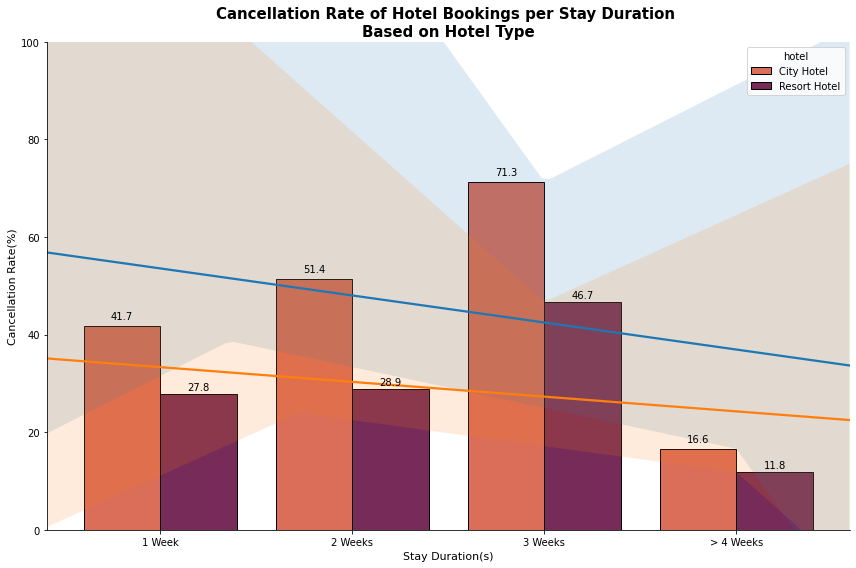

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Cancellation Rate of Hotel Bookings per Stay Duration \nBased on Hotel Type", fontsize=15, color='black', weight='bold')
sns.barplot(x='stay_duration_group', y='cancellation_rate', data=hotel_stay_plot, hue='hotel', edgecolor='black', palette='rocket_r')

sns.regplot(x=np.arange(0, len(hotel_stay_plot[hotel_stay_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=hotel_stay_plot[hotel_stay_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(hotel_stay_plot[hotel_stay_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=hotel_stay_plot[hotel_stay_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()

- The most canceled occur in City Hotel.
- The highest cancellation rate in City Hotel and Resort Hotel is in the stay for 3 weeks.
- The cancellation rate for a stay of more than 4 weeks is really low compared to the other three group stay based on the duration of staying.
- To reduce the cancellation rate for total stays of less than 4 weeks (1 month), we can give a special promo


# Task 4

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

## Lead Time

In [ ]:
lead_time_list=[]
for i in df_pre['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df_pre['lead_time_group'] = lead_time_list

In [ ]:
lead_time_list=[]
for i in df_pre['lead_time']:
    if i <= 60:
        lead_group = '2 Month'
    elif i >= 61 and i <= 120:
        lead_group = '3-4 Months'
    elif i >= 121 and i <= 180:
        lead_group = '5-6 Months'
    elif i >= 181 and i <= 240:
        lead_group = '7-8 Months'
    elif i >= 241 and i <= 300:
        lead_group = '9-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df_pre['lead_time_group'] = lead_time_list

In [ ]:
hotel_lead = df_pre.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'adr':'count'}).reset_index()
hotel_lead.rename(columns={'adr':'nums_booking'}, inplace=True)

#sum booking column
df_sum = hotel_lead.groupby(['hotel', 'lead_time_group']).agg({'nums_booking':'sum'}).reset_index()
df_sum.rename(columns={'nums_booking':'sum_booking'}, inplace=True)
hotel_lead = hotel_lead.merge(df_sum, on=['hotel', 'lead_time_group'])

#cancellation rate
hotel_lead['cancellation_rate'] = round((hotel_lead['nums_booking']/hotel_lead['sum_booking'])*100, 2)
hotel_lead

,hotel,lead_time_group,is_canceled,nums_booking,sum_booking,cancellation_rate
0,City Hotel,11-12 Months,0,568,2508,22.65
1,City Hotel,11-12 Months,1,1940,2508,77.35
2,City Hotel,2 Month,0,25444,35247,72.19
3,City Hotel,2 Month,1,9803,35247,27.81
4,City Hotel,3-4 Months,0,9177,16355,56.11
5,City Hotel,3-4 Months,1,7178,16355,43.89
6,City Hotel,5-6 Months,0,5516,10776,51.19
7,City Hotel,5-6 Months,1,5260,10776,48.81
8,City Hotel,7-8 Months,0,3026,6099,49.61
9,City Hotel,7-8 Months,1,3073,6099,50.39


In [ ]:
#pick the data that hotels has been cancelled
hotel_lead_plot = hotel_lead[hotel_lead['is_canceled']==1]
hotel_lead_plot

,hotel,lead_time_group,is_canceled,nums_booking,sum_booking,cancellation_rate
1,City Hotel,11-12 Months,1,1940,2508,77.35
3,City Hotel,2 Month,1,9803,35247,27.81
5,City Hotel,3-4 Months,1,7178,16355,43.89
7,City Hotel,5-6 Months,1,5260,10776,48.81
9,City Hotel,7-8 Months,1,3073,6099,50.39
11,City Hotel,9-10 Months,1,3101,4643,66.79
13,City Hotel,>12 Months,1,2743,3698,74.18
15,Resort Hotel,11-12 Months,1,395,910,43.41
17,Resort Hotel,2 Month,1,3552,20425,17.39
19,Resort Hotel,3-4 Months,1,2434,6662,36.54


## Visualization

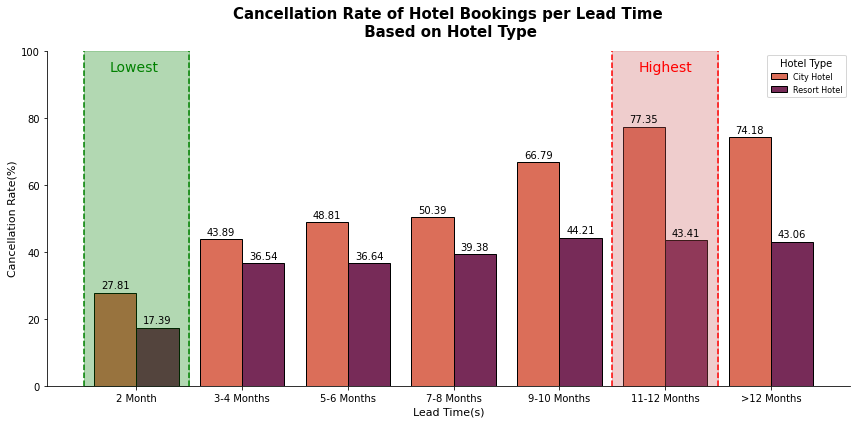

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Cancellation Rate of Hotel Bookings per Lead Time\n Based on Hotel Type", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='lead_time_group', y='cancellation_rate', data=hotel_lead_plot, hue='hotel', order=['2 Month', '3-4 Months', '5-6 Months', '7-8 Months', '9-10 Months', '11-12 Months', '>12 Months'], edgecolor='black', palette='rocket_r')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='red')
plt.axvline(5.5, ls='--', color='red')
plt.stackplot(np.arange(4.5,6.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=4.75, y=95, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='green', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='green', va='center')

plt.legend(title='Hotel Type', prop={'size':8}, loc=1)

sns.despine()
plt.tight_layout()

- Both hotel types has lowest cancellation rate on 1 month lead time
- highest cancellation rate on 11-12 months lead time
- Generally, the longer the lead time then the higher the probability of order cancellation
- To decrease the cancellation rate, we can make regulations a maximum of 60 days before the day of arrival to get a special promo. This will also make it easier for the hotel to apply room pricing dynamically depending on the event that will occur on the date booked by the consumer
- We can also make a maximum regulation of 60 days before the day of arrival for the no deposit type. Non-refundable deposit type will be applied to orders with a lead time of more than 60 days